In [1]:
import numpy as np
from uncertainties import ufloat #All numbers with Gaussian error-propagation are treated as ufloat for automation of error propagation.
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=42


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

### Phase-space factors (PSFs) for neutrinoless decays $^{124}$Xe

-  **KI**
       Phys. Rev. C 87 (2013) 057301 (0vECb+, 0vb+b+)
       Phys. Rev. C 89 (2014) 064319 (0vECEC) 

-  **DK**        
       Reference therein **[35]**: Doi M, Kotani T
       "Neutrino emitting of double beta decay",
       Prog Theor Phys. 87 (1992) 1207–31. 

- **SM**
       Reference therein **[39]**: own work by S. Stoica and M. Mirea

In [3]:
G_0vecec = {'SM': None, 
            'KI': 25.7e-20, 
            'DK': None
           }

g0vecec = ufloat(25.7e-20,0)
delta_g0vecec = 0


G_0vecbp = {'SM': 1710e-20, 
            'KI': 1970e-20, 
            'DK': 2290e-20
           }

g0vecbp = np.divide(np.max(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']]))+np.min(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']])),2)
delta_g0vecbp = np.divide(np.max(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']]))-np.min(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']])),2)
g0vecbp = ufloat(g0vecbp, delta_g0vecbp)


G_0vbpbp = {'SM': 107.8e-20, 
            'KI': 114e-20, 
            'DK': 123e-20
           }

g0vbpbp = np.divide(np.max(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']]))+np.min(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']])),2)
delta_g0vbpbp = np.divide(np.max(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']]))-np.min(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']])),2)
g0vbpbp = ufloat(g0vbpbp, delta_g0vbpbp)

print('PSF for 0vECEC:',g0vecec)
print('PSF for 0vECb+:',g0vecbp)
print('PSF for 0vb+b+:',g0vbpbp)

PSF for 0vECEC: (2.5700000000000003+/-0)e-19
PSF for 0vECb+: (2.00+/-0.29)e-17
PSF for 0vb+b+: (1.15+/-0.08)e-18


### Nuclear matrix elements (NME) for neutrinoless decays of $^{124}$Xe

- **QRPA**
       Suhonen, J. Phys. G 40 (2013), 075102

-  **IBM** 
       Kotila, Barea, Iachello, Phys. Rev. C 91 (2015), 034304 (0vECb+, 0vb+b+)
       Kotila, Barea, Iachello, Phys. Rev. C 89 (2014), 064319 (0vECEC) 

-  **NSM**        
       Javier Menendez, Personal communication (analogous to Menendez, J. Phys. G 45 (2018) no. 1, 014003)


## Method 1: Direct calculation using existing neutrino mass limits

### What to do with $g_A$?
- **QRPA** 
     
     $g_A=[1,\,1.25]$ are discussed in the paper. 
     However factoring out $g_A$ is not trivial, since the Gamow-Teller and Fermi-Matrix elements themselves differ for $g_A$ (Tab. 2).
     We assume the larger value $g_A=1.25$


- **IBM** 
    
    One has to has to multiply $M=M_x \cdot g_{A,eff}^2$ and $g_{A,eff}=[1.269 \cdot A^{-0.18},\,1.269]$.
    Here one can factorize out $g_A$. 
    As for QRPA we assume an unquenched $g_A = 1.269$.


- **NSM** 
    
    We do not consider $g_A$-quenching in the shell model, as the corresponding effects are accounted for by nuclear correlations


In [4]:
gA_xe124 = {'QRPA': [1, 1.25],
            'IBM': [1.269*(124**(-0.18)), 1.269] #For Xe136 exchange 124 -> 136
           }

In [5]:
M_0vecec = {'QRPA': [1.080,1.298], #range stems from use of different bases and sets of correlations
            'IBM': 0.297 #no uncertainty given in the publication
           }

M_0vecbp = {'QRPA': [4.692,6.617], #range stems from use of different bases and sets of correlations
            'IBM': ufloat(4.74,0.76),
            'NSM': [2.22,4.77]
           }

M_0vbpbp = M_0vecbp



In [6]:
# 1.1 eV: M. Aker et al. (KATRIN), Phys. Rev. Lett.123, 221802 (2019), 1909.06048
# 0.3 eV: I. Esteban, M.C. Gonzalez-Garcia, A. Hernandez-Cabezudo, M. Maltoni, and T. Schwetz, JHEP 01, 106 (2019)
mnu = (0.3e-3, 1.1e-3) #keV 

#PDG (2018): http://pdg.lbl.gov/2018/listings/rpp2018-list-electron.pdf
me = ufloat(510.9989461, 0.0000031) #keV

# Nesterenko et. al. 
R = ufloat(2.42,0.47) 

### MC uncertainty propagation

In [7]:
def sample_halflife_mnusquare(me, mnusquare, NME, PSF, R=ufloat(1.,0), samples=10000):
    '''Input Gaussian PDFs of all parameters and sample from those. Then make 90% C.L. lower limit.'''

    
    samples_me = np.random.normal(me.nominal_value, me.std_dev, samples)
    samples_mnusquare = np.random.normal(mnusquare.nominal_value, mnusquare.std_dev, samples)
    samples_NME = np.random.normal(NME.nominal_value, NME.std_dev, samples)
    samples_PSF = np.random.normal(PSF.nominal_value, PSF.std_dev, samples)
    samples_R = np.random.normal(R.nominal_value, R.std_dev, samples)
    
    halflives = np.divide(1,np.multiply(np.power(samples_NME,2),np.multiply(samples_PSF, np.multiply(np.divide(np.absolute(samples_mnusquare),np.power(samples_me,2)), samples_R))))
    
    #sample from distribution of each parameter and calculate half-life for each sample
    #Find 90% lower limit from ensemble
    return halflives 


#Try uniform distributions where one samples from 10% and 90% of the time
def sample_halflife_mnu(me, mnu, NME, PSF, R=ufloat(1.,0), samples=10000):
    '''Input Gaussian PDFs of all parameters and sample from those. Then make 90% C.L. lower limit.'''

    
    samples_me = np.random.normal(me.nominal_value, me.std_dev, samples)
    samples_mnu = np.random.normal(mnu.nominal_value, mnusquare.std_dev, samples)
    samples_NME = np.random.normal(NME.nominal_value, NME.std_dev, samples)
    samples_PSF = np.random.normal(PSF.nominal_value, PSF.std_dev, samples)
    samples_R = np.random.normal(R.nominal_value, R.std_dev, samples)
    
    halflives = np.divide(1,np.multiply(np.power(samples_NME,2),np.multiply(samples_PSF, np.multiply(np.divide(np.power(np.absolute(samples_mnu),2),np.power(samples_me,2)), samples_R))))
    
    #sample from distribution of each parameter and calculate half-life for each sample
    #Find 90% lower limit from ensemble
    return halflives 

def plot_loghist(x, nbins=100, histrange=(1,1e32), **kwargs):
    '''Plots a histogram with logarithmic bin size (to make it look nice on a logscale)'''
    hist, bins = np.histogram(x, bins=nbins, range=histrange)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, range=histrange, **kwargs)
    plt.xscale('log')

## 0$\nu$ECEC

In [8]:
#QRPA at gA=1.25
m0vecec_qrpa=np.mean(M_0vecec['QRPA'])
delta_m0vecec_qrpa=np.std(M_0vecec['QRPA'])

m0vecec_qrpa = ufloat(m0vecec_qrpa,delta_m0vecec_qrpa)

T_0vecec_qrpa = np.divide(1,np.multiply((m0vecec_qrpa**2) * (g0vecec) * R * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for QRPA at gA=1.25:', T_0vecec_qrpa, '\n')

#IBM at gA=1.269
m0vecec_ibm = ufloat(M_0vecec['IBM']*(np.max(gA_xe124['IBM'])**2),0)

T_0vecec_ibm = np.divide(1,np.multiply((m0vecec_ibm**2) * (g0vecec) * R * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for IBM at gA=1.269:', T_0vecec_ibm, '\n')


#### Test with $\langle m_\nu\rangle^2 = (-1.0 \pm 1.0)\,\text{eV}^2$ from KATRIN and $1/T_{1/2}$ to avoid pole

QRPA lower limit on T_1/2: [1.24221992e+29] yr


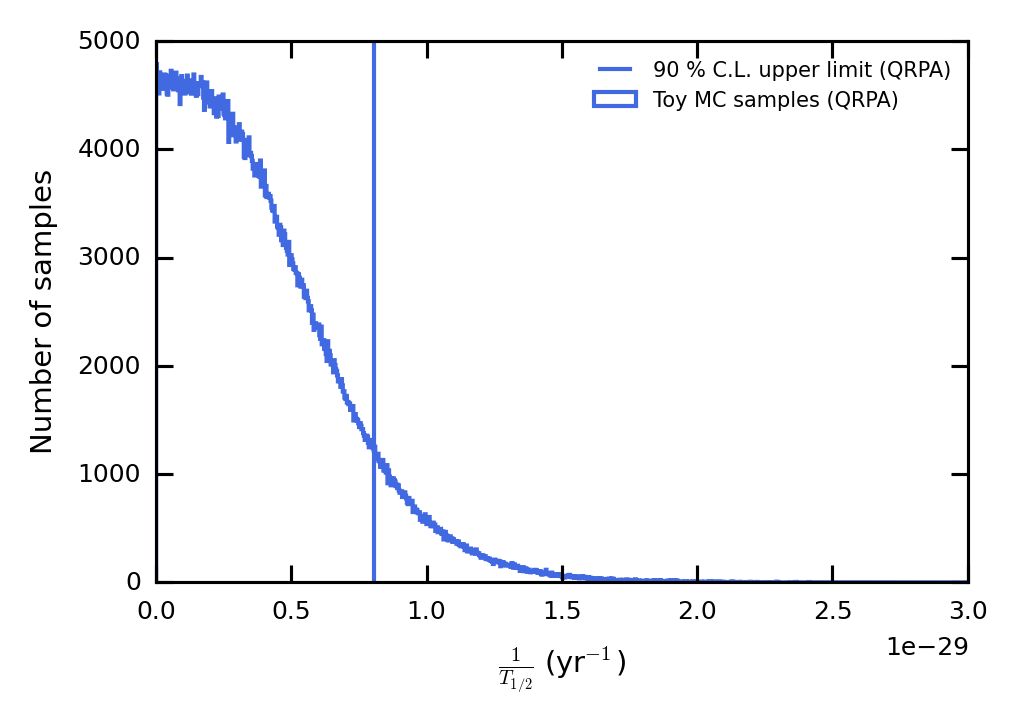

In [9]:
# The squared neutrino mass can become 0. Thus T_1/2 has a pole! => no, the absolute value is taken!

# Calculate the inverse of the half-life in order to avoid hitting the pole

mnu_square_katrin = ufloat(-1.0e-6, 1.0e-6)
t0vecec_qrpa=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecec_qrpa, g0vecec, R, 1000000)

plt.hist(1/t0vecec_qrpa, bins=1000, facecolor='royalblue', edgecolor='royalblue', range=(0,3e-29), label='Toy MC samples (QRPA)', histtype='step')

upperlimit_qrpa=np.quantile(1/t0vecec_qrpa, [0.9])

print('QRPA lower limit on T_1/2:', 1/upperlimit_qrpa, 'yr')


#################################
#################################
#################################
#Feldman & Cousins stuff not needed. Was here because forgot the absolute value of mnu^2 above which allowed negative rates
#print('Mean:', np.mean(1/t0vecec_qrpa))
#print('Std:', np.std(1/t0vecec_qrpa))
#print('Mean/Std:', np.mean(1/t0vecec_qrpa)/np.std(1/t0vecec_qrpa))

#upperlimit=0.88*np.std(1/t0vecec_qrpa) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
#lowerlimit=1/upperlimit
#print('FC 90% CL upper limit on 1/T:', upperlimit) 
#print('FC 90% CL lower limit on T:', lowerlimit)

#plt.axvline(np.mean(1/t0vecec_qrpa), color='black', label='Mean')
#plt.axvline(np.median(1/t0vecec_qrpa), color='darkseagreen', label='Median')
#plt.axvline(np.mean(1/t0vecec_qrpa)+np.std(1/t0vecec_qrpa), color='black', linestyle=':')
#plt.axvline(np.mean(1/t0vecec_qrpa)-np.std(1/t0vecec_qrpa), color='black', linestyle=':')

#################################
#################################
#################################

plt.axvline(upperlimit_qrpa, color='royalblue', label=('90 % C.L. upper limit (QRPA)'))
plt.xlabel('$\\frac{1}{T_{1/2}}$ (yr$^{-1}$)')
plt.ylabel('Number of samples')
plt.legend(frameon=False)

plt.draw()
plt.show()

#### QRPA and IBM for $m_\nu < 1.1\,\text{eV}$

QRPA lower limit on T_1/2: [1.24100831e+29] yr
IBM lower limit on T_1/2: [7.8600232e+29] yr


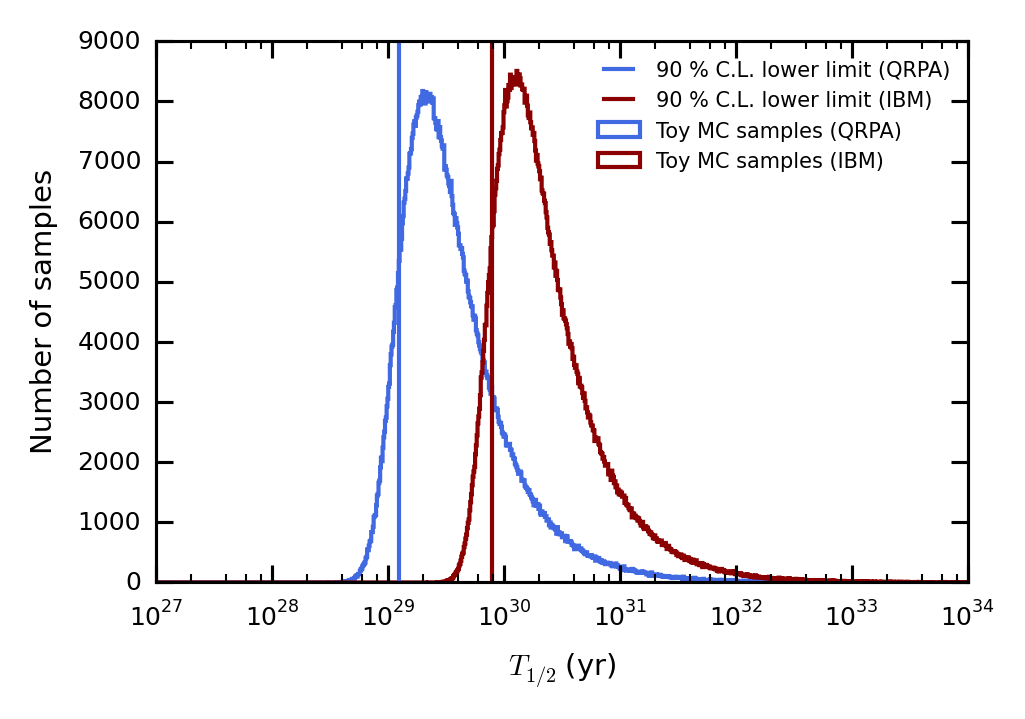

In [10]:
mnu_square_katrin = ufloat(-1.0e-6, 1.0e-6)

t0vecec_qrpa=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecec_qrpa, g0vecec, R, 1000000)
t0vecec_ibm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecec_ibm, g0vecec, R, 1000000)

lowerlimit_qrpa = np.quantile(t0vecec_qrpa, [0.1])
lowerlimit_ibm = np.quantile(t0vecec_ibm, [0.1])

print('QRPA lower limit on T_1/2:', lowerlimit_qrpa, 'yr')
print('IBM lower limit on T_1/2:', lowerlimit_ibm, 'yr')

#Show negative values by multiplying with -1
plot_loghist(t0vecec_qrpa, 1000, histrange=(1e27,1e34), facecolor='royalblue', edgecolor='royalblue', label='Toy MC samples (QRPA)', histtype='step')
plot_loghist(t0vecec_ibm, 1000, histrange=(1e27,1e34), facecolor='darkred', edgecolor='darkred', label='Toy MC samples (IBM)', histtype='step')

plt.axvline(lowerlimit_qrpa, color='royalblue', label=('90 % C.L. lower limit (QRPA)'))
plt.axvline(lowerlimit_ibm, color='darkred', label=('90 % C.L. lower limit (IBM)'))

plt.legend(frameon=False)
plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')

#plt.draw()
#plt.show()
 
    
#print('Mean:', np.mean(1/t0vecec_qrpa))
#print('Std:', np.std(1/t0vecec_qrpa))
#print('Mean/Std:', np.mean(1/t0vecec_qrpa)/np.std(1/t0vecec_qrpa))
#print('FC limit at 90% CL:', 1/(2.94*np.std(1/t0vecec_qrpa)))


#### QRPA and IBM for $m_\nu < 0.3\,\text{eV}$

QRPA lower limit on T_1/2: [1.66961895e+30] yr
IBM lower limit on T_1/2: [1.05561557e+31] yr


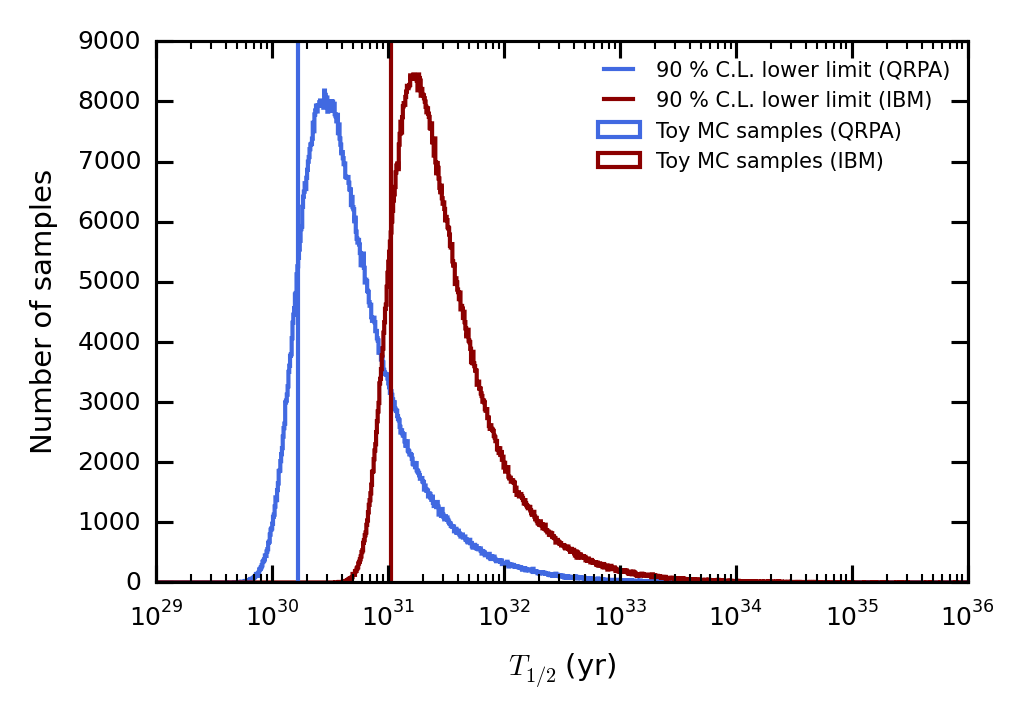

In [11]:
mnu_square_katrin = ufloat(-1.0e-6/(1.1**2/0.3**2), 1.0e-6/(1.1**2/0.3**2))
t0vecec_qrpa=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecec_qrpa, g0vecec, R, 1000000)
t0vecec_ibm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecec_ibm, g0vecec, R, 1000000)

lowerlimit_qrpa = np.quantile(t0vecec_qrpa, [0.1])
lowerlimit_ibm = np.quantile(t0vecec_ibm, [0.1])

print('QRPA lower limit on T_1/2:', lowerlimit_qrpa, 'yr')
print('IBM lower limit on T_1/2:', lowerlimit_ibm, 'yr')

#Show negative values by multiplying with -1
plot_loghist(t0vecec_qrpa, 1000, histrange=(1e29,1e36), facecolor='royalblue', edgecolor='royalblue', label='Toy MC samples (QRPA)', histtype='step')
plot_loghist(t0vecec_ibm, 1000, histrange=(1e29,1e36), facecolor='darkred', edgecolor='darkred', label='Toy MC samples (IBM)', histtype='step')

plt.axvline(lowerlimit_qrpa, color='royalblue', label=('90 % C.L. lower limit (QRPA)'))
plt.axvline(lowerlimit_ibm, color='darkred', label=('90 % C.L. lower limit (IBM)'))

plt.legend(frameon=False)
plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')

#plt.draw()
#plt.show()
 

### 0$\nu$EC$\beta^+$

In [12]:
#QRPA at gA=1.25
m0vecbp_qrpa=np.mean(M_0vecbp['QRPA'])
delta_m0vecbp_qrpa=np.std(M_0vecbp['QRPA'])

m0vecbp_qrpa = ufloat(m0vecbp_qrpa,delta_m0vecbp_qrpa)

T_0vecbp_qrpa = np.divide(1,np.multiply((m0vecbp_qrpa**2) * (g0vecbp) * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for QRPA at gA=1.25:', T_0vecbp_qrpa, '\n')

#IBM at gA=1.269
m0vecbp_ibm = M_0vecbp['IBM']*(np.max(gA_xe124['IBM'])**2)

T_0vecbp_ibm = np.divide(1,np.multiply((m0vecbp_ibm**2) * (g0vecbp) * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for IBM at gA=1.269:', T_0vecbp_ibm, '\n')

#NSM
m0vecbp_nsm=np.mean(M_0vecbp['NSM'])
delta_m0vecbp_nsm=np.std(M_0vecbp['NSM'])

m0vecbp_nsm = ufloat(m0vecbp_nsm,delta_m0vecbp_nsm)

T_0vecbp_nsm = np.divide(1,np.multiply((m0vecbp_nsm**2) * (g0vecbp) * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for NSM:', T_0vecbp_nsm, '\n')

#### QRPA, IBM and NSM for $m_\nu < 1.1\,\text{eV}$

QRPA lower limit on T_1/2: [1.6245656e+26] yr
IBM lower limit on T_1/2: [8.97733457e+25] yr
NSM lower limit on T_1/2: [3.41824193e+26] yr


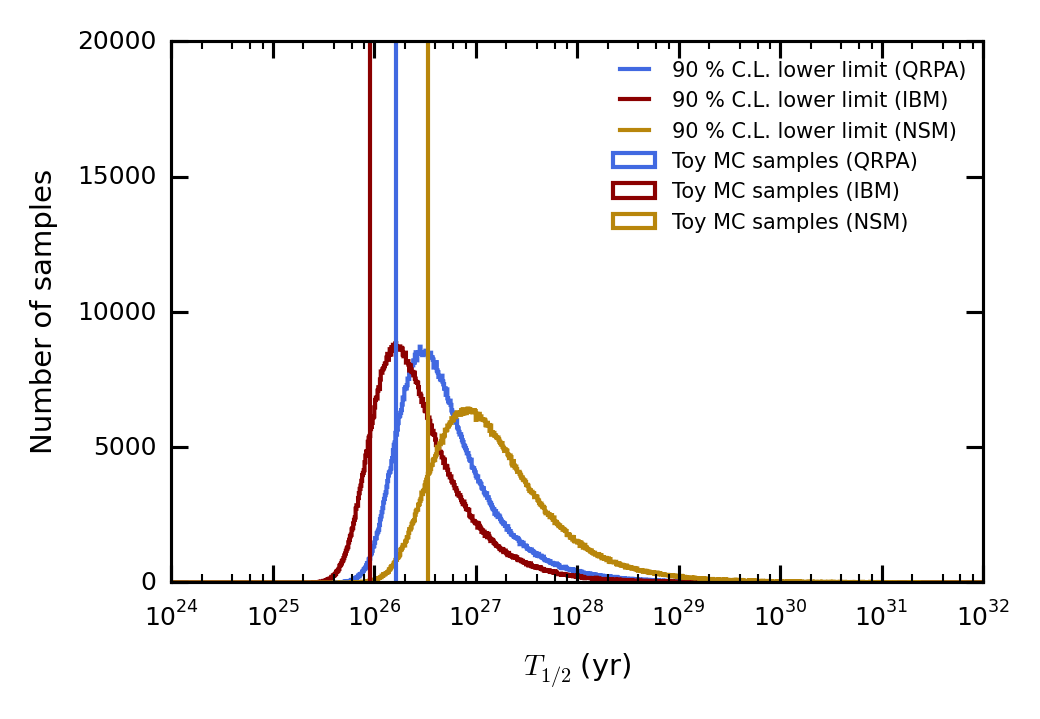

In [18]:
mnu_square_katrin = ufloat(-1.0e-6, 1.0e-6)
t0vecbp_qrpa=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecbp_qrpa, g0vecbp, ufloat(1.,0), 1000000)
t0vecbp_ibm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecbp_ibm, g0vecbp, ufloat(1.,0), 1000000)
t0vecbp_nsm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecbp_nsm, g0vecbp, ufloat(1.,0), 1000000)


lowerlimit_qrpa = np.quantile(t0vecbp_qrpa, [0.1])
lowerlimit_ibm = np.quantile(t0vecbp_ibm, [0.1])
lowerlimit_nsm = np.quantile(t0vecbp_nsm, [0.1])

print('QRPA lower limit on T_1/2:', lowerlimit_qrpa, 'yr')
print('IBM lower limit on T_1/2:', lowerlimit_ibm, 'yr')
print('NSM lower limit on T_1/2:', lowerlimit_nsm, 'yr')

#Show negative values by multiplying with -1
plot_loghist(t0vecbp_qrpa, 1000, histrange=(1e24,1e32), facecolor='royalblue', edgecolor='royalblue', label='Toy MC samples (QRPA)', histtype='step')
plot_loghist(t0vecbp_ibm, 1000, histrange=(1e24,1e32), facecolor='darkred', edgecolor='darkred', label='Toy MC samples (IBM)', histtype='step')
plot_loghist(t0vecbp_nsm, 1000, histrange=(1e24,1e32), facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='Toy MC samples (NSM)', histtype='step')

plt.axvline(lowerlimit_qrpa, color='royalblue', label=('90 % C.L. lower limit (QRPA)'))
plt.axvline(lowerlimit_ibm, color='darkred', label=('90 % C.L. lower limit (IBM)'))
plt.axvline(lowerlimit_nsm, color='darkgoldenrod', label=('90 % C.L. lower limit (NSM)'))

plt.legend(frameon=False)
plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
plt.ylim(0,20000)

plt.draw()
plt.show()
 

#### QRPA, IBM and NSM for $m_\nu < 0.3\,\text{eV}$

QRPA lower limit on T_1/2: [2.18522643e+27] yr
IBM lower limit on T_1/2: [1.20842169e+27] yr
NSM lower limit on T_1/2: [4.60168079e+27] yr


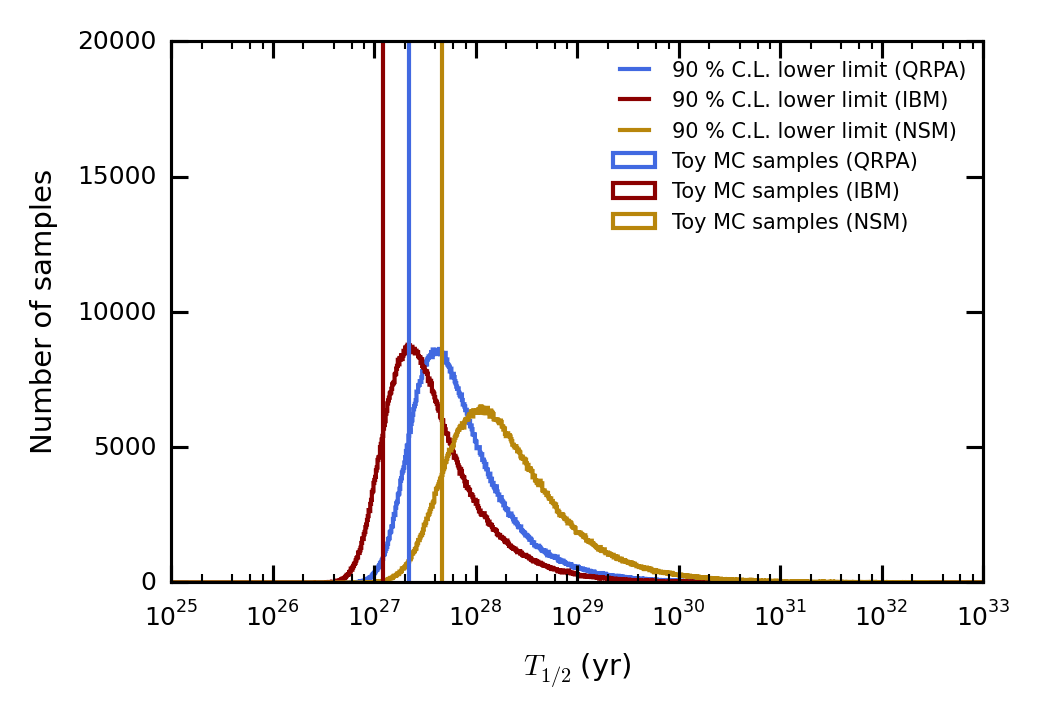

In [24]:
mnu_square_katrin = ufloat(-1.0e-6/(1.1**2/0.3**2), 1.0e-6/(1.1**2/0.3**2))
t0vecbp_qrpa=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecbp_qrpa, g0vecbp, ufloat(1.,0), 1000000)
t0vecbp_ibm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecbp_ibm, g0vecbp, ufloat(1.,0), 1000000)
t0vecbp_nsm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vecbp_nsm, g0vecbp, ufloat(1.,0), 1000000)


lowerlimit_qrpa = np.quantile(t0vecbp_qrpa, [0.1])
lowerlimit_ibm = np.quantile(t0vecbp_ibm, [0.1])
lowerlimit_nsm = np.quantile(t0vecbp_nsm, [0.1])

print('QRPA lower limit on T_1/2:', lowerlimit_qrpa, 'yr')
print('IBM lower limit on T_1/2:', lowerlimit_ibm, 'yr')
print('NSM lower limit on T_1/2:', lowerlimit_nsm, 'yr')

#Show negative values by multiplying with -1
plot_loghist(t0vecbp_qrpa, 1000, histrange=(1e25,1e33), facecolor='royalblue', edgecolor='royalblue', label='Toy MC samples (QRPA)', histtype='step')
plot_loghist(t0vecbp_ibm, 1000, histrange=(1e25,1e33), facecolor='darkred', edgecolor='darkred', label='Toy MC samples (IBM)', histtype='step')
plot_loghist(t0vecbp_nsm, 1000, histrange=(1e25,1e33), facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='Toy MC samples (NSM)', histtype='step')

plt.axvline(lowerlimit_qrpa, color='royalblue', label=('90 % C.L. lower limit (QRPA)'))
plt.axvline(lowerlimit_ibm, color='darkred', label=('90 % C.L. lower limit (IBM)'))
plt.axvline(lowerlimit_nsm, color='darkgoldenrod', label=('90 % C.L. lower limit (NSM)'))

plt.legend(frameon=False)
plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
plt.ylim(0,20000)

plt.draw()
plt.show()
 

### 0$\nu\beta^+\beta^+$

In [19]:
#QRPA at gA=1.25
m0vbpbp_qrpa=np.mean(M_0vbpbp['QRPA'])
delta_m0vbpbp_qrpa=np.std(M_0vbpbp['QRPA'])

m0vbpbp_qrpa = ufloat(m0vbpbp_qrpa,delta_m0vbpbp_qrpa)

T_0vbpbp_qrpa = np.divide(1,np.multiply((m0vbpbp_qrpa**2) * (g0vbpbp) * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for QRPA at gA=1.25:', T_0vbpbp_qrpa, '\n')

#IBM at gA=1.269
m0vbpbp_ibm = M_0vbpbp['IBM']*(np.max(gA_xe124['IBM'])**2)

T_0vbpbp_ibm = np.divide(1,np.multiply((m0vbpbp_ibm**2) * (g0vbpbp) * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for IBM at gA=1.269:', T_0vbpbp_ibm, '\n')

#NSM
m0vbpbp_nsm=np.mean(M_0vbpbp['NSM'])
delta_m0vbpbp_nsm=np.std(M_0vbpbp['NSM'])

m0vbpbp_nsm = ufloat(m0vbpbp_nsm,delta_m0vbpbp_nsm)

T_0vbpbp_nsm = np.divide(1,np.multiply((m0vbpbp_nsm**2) * (g0vbpbp) * ((1/me)**2), np.power(mnu,2)))

#print('Half-life range for NSM:', T_0vbpbp_nsm, '\n')

#### QRPA, IBM and NSM for $m_\nu < 1.1\,\text{eV}$

QRPA lower limit on T_1/2: [2.83802285e+27] yr
IBM lower limit on T_1/2: [1.57153089e+27] yr
NSM lower limit on T_1/2: [5.95663094e+27] yr


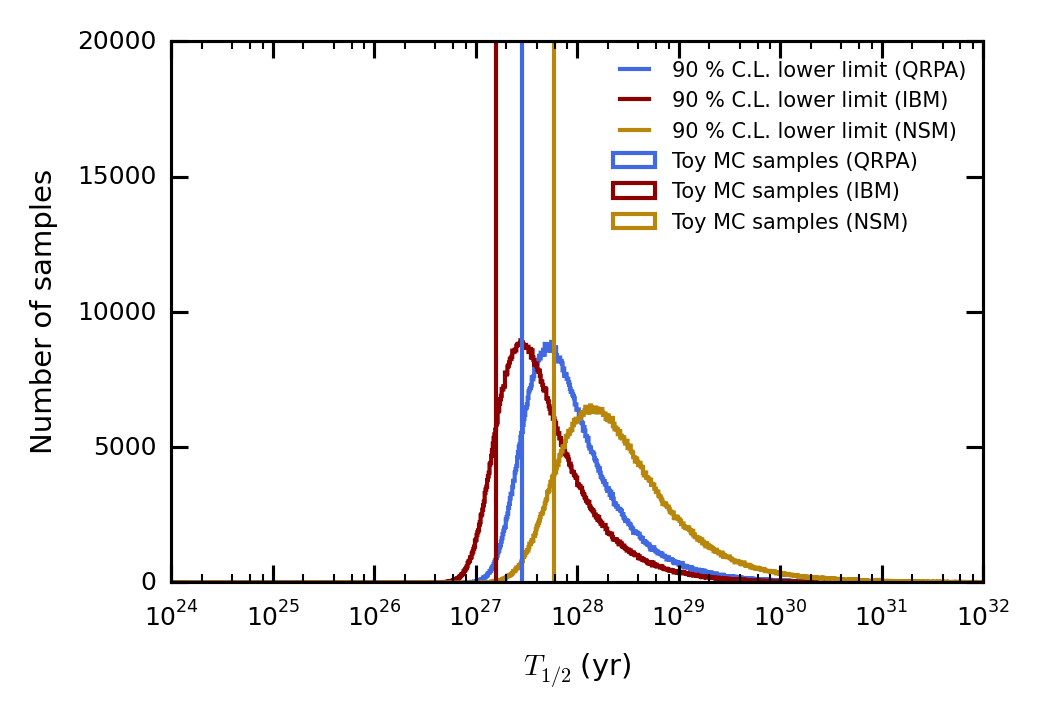

In [20]:
mnu_square_katrin = ufloat(-1.0e-6, 1.0e-6)
t0vbpbp_qrpa=sample_halflife_mnusquare(me, mnu_square_katrin, m0vbpbp_qrpa, g0vbpbp, ufloat(1.,0), 1000000)
t0vbpbp_ibm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vbpbp_ibm, g0vbpbp, ufloat(1.,0), 1000000)
t0vbpbp_nsm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vbpbp_nsm, g0vbpbp, ufloat(1.,0), 1000000)


lowerlimit_qrpa = np.quantile(t0vbpbp_qrpa, [0.1])
lowerlimit_ibm = np.quantile(t0vbpbp_ibm, [0.1])
lowerlimit_nsm = np.quantile(t0vbpbp_nsm, [0.1])

print('QRPA lower limit on T_1/2:', lowerlimit_qrpa, 'yr')
print('IBM lower limit on T_1/2:', lowerlimit_ibm, 'yr')
print('NSM lower limit on T_1/2:', lowerlimit_nsm, 'yr')

#Show negative values by multiplying with -1
plot_loghist(t0vbpbp_qrpa, 1000, histrange=(1e24,1e32), facecolor='royalblue', edgecolor='royalblue', label='Toy MC samples (QRPA)', histtype='step')
plot_loghist(t0vbpbp_ibm, 1000, histrange=(1e24,1e32), facecolor='darkred', edgecolor='darkred', label='Toy MC samples (IBM)', histtype='step')
plot_loghist(t0vbpbp_nsm, 1000, histrange=(1e24,1e32), facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='Toy MC samples (NSM)', histtype='step')

plt.axvline(lowerlimit_qrpa, color='royalblue', label=('90 % C.L. lower limit (QRPA)'))
plt.axvline(lowerlimit_ibm, color='darkred', label=('90 % C.L. lower limit (IBM)'))
plt.axvline(lowerlimit_nsm, color='darkgoldenrod', label=('90 % C.L. lower limit (NSM)'))

plt.legend(frameon=False)
plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
plt.ylim(0,20000)

plt.draw()
plt.show()
 

#### QRPA, IBM and NSM for $m_\nu < 0.3\,\text{eV}$

QRPA lower limit on T_1/2: [3.8026548e+28] yr
IBM lower limit on T_1/2: [2.1061729e+28] yr
NSM lower limit on T_1/2: [8.01638856e+28] yr


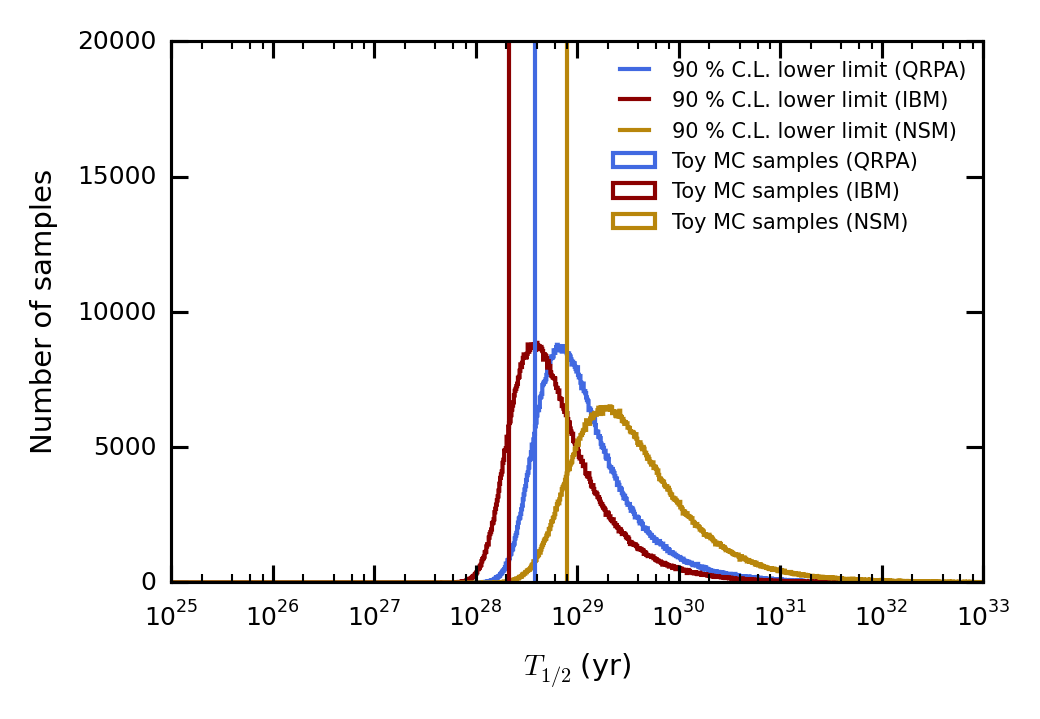

In [23]:
mnu_square_katrin = ufloat(-1.0e-6/(1.1**2/0.3**2), 1.0e-6/(1.1**2/0.3**2))
t0vbpbp_qrpa=sample_halflife_mnusquare(me, mnu_square_katrin, m0vbpbp_qrpa, g0vbpbp, ufloat(1.,0), 1000000)
t0vbpbp_ibm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vbpbp_ibm, g0vbpbp, ufloat(1.,0), 1000000)
t0vbpbp_nsm=sample_halflife_mnusquare(me, mnu_square_katrin, m0vbpbp_nsm, g0vbpbp, ufloat(1.,0), 1000000)


lowerlimit_qrpa = np.quantile(t0vbpbp_qrpa, [0.1])
lowerlimit_ibm = np.quantile(t0vbpbp_ibm, [0.1])
lowerlimit_nsm = np.quantile(t0vbpbp_nsm, [0.1])

print('QRPA lower limit on T_1/2:', lowerlimit_qrpa, 'yr')
print('IBM lower limit on T_1/2:', lowerlimit_ibm, 'yr')
print('NSM lower limit on T_1/2:', lowerlimit_nsm, 'yr')

#Show negative values by multiplying with -1
plot_loghist(t0vbpbp_qrpa, 1000, histrange=(1e25,1e33), facecolor='royalblue', edgecolor='royalblue', label='Toy MC samples (QRPA)', histtype='step')
plot_loghist(t0vbpbp_ibm, 1000, histrange=(1e25,1e33), facecolor='darkred', edgecolor='darkred', label='Toy MC samples (IBM)', histtype='step')
plot_loghist(t0vbpbp_nsm, 1000, histrange=(1e25,1e33), facecolor='darkgoldenrod', edgecolor='darkgoldenrod', label='Toy MC samples (NSM)', histtype='step')

plt.axvline(lowerlimit_qrpa, color='royalblue', label=('90 % C.L. lower limit (QRPA)'))
plt.axvline(lowerlimit_ibm, color='darkred', label=('90 % C.L. lower limit (IBM)'))
plt.axvline(lowerlimit_nsm, color='darkgoldenrod', label=('90 % C.L. lower limit (NSM)'))

plt.legend(frameon=False)
plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
plt.ylim(0,20000)

plt.draw()
plt.show()
 

## Method 2: Calculation using measured 90 % C.L. half-life limits for $^{136}$Xe from KamLAND Zen and NME calculations

As only the IBM model allows to easily factor out $g_A$, we illustrate the method on this.

In [16]:
T_0vbb = 1.07e26 # T_1/2 > 1.07 * 10^26 yr at 90% CL
G_136Xe = ufloat(14.56, 0.02) # mean and std from Kotila, Iachello, PRC 85 (2012), 034316 and Mirea, Stoica, Rep.Phys. 67 (2015)
M_136Xe = {'IBM': 3.05, # IBM-2 without gA_eff**2 from Kotila, Barea, Iachello, PRC91 (2015) 034304
           'NSM': [2.28, 2.45] # NSM from Menendez, J.Phys. G 45 (2018), no. 1, 014003
          } 



### How similar is $g_{\text{A,eff}}$ for A=124 and A=136 for the IBM method?

In [17]:
print('Value for gA_eff(Xe-136): %3.4f' % (1.269*(136**(-0.18))) )
print('Value for gA_eff(Xe-124): %3.4f' % (1.269*(124**(-0.18))) )

print('Ratio of [gA_eff(Xe-124)/gA_eff(Xe-136)]**2: %3.4f' % ( ((1.269*(124**(-0.18)))**2)/((1.269*(136**(-0.18)))**2) ) )

Value for gA_eff(Xe-136): 0.5241
Value for gA_eff(Xe-124): 0.5329
Ratio of [gA_eff(Xe-124)/gA_eff(Xe-136)]**2: 1.0338
